# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

D:\INSTALLED_SOFTWARES\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

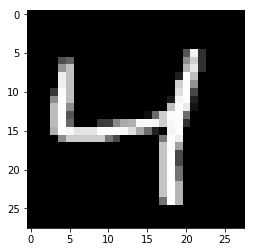

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = 
targets_ = 

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = 

# Output layer logits, fully connected layer with no activation
logits = 
# Sigmoid output from logits
decoded = 

# Sigmoid cross-entropy loss
loss = 
# Mean of the loss
cost = 

# Adam optimizer
opt = 

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [10]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [11]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6950
Epoch: 1/20... Training loss: 0.6919
Epoch: 1/20... Training loss: 0.6889
Epoch: 1/20... Training loss: 0.6855
Epoch: 1/20... Training loss: 0.6815
Epoch: 1/20... Training loss: 0.6767
Epoch: 1/20... Training loss: 0.6700
Epoch: 1/20... Training loss: 0.6616
Epoch: 1/20... Training loss: 0.6538
Epoch: 1/20... Training loss: 0.6432
Epoch: 1/20... Training loss: 0.6313
Epoch: 1/20... Training loss: 0.6175
Epoch: 1/20... Training loss: 0.6010
Epoch: 1/20... Training loss: 0.5850
Epoch: 1/20... Training loss: 0.5705
Epoch: 1/20... Training loss: 0.5508
Epoch: 1/20... Training loss: 0.5348
Epoch: 1/20... Training loss: 0.5157
Epoch: 1/20... Training loss: 0.4956
Epoch: 1/20... Training loss: 0.4822
Epoch: 1/20... Training loss: 0.4616
Epoch: 1/20... Training loss: 0.4480
Epoch: 1/20... Training loss: 0.4248
Epoch: 1/20... Training loss: 0.4181
Epoch: 1/20... Training loss: 0.3990
Epoch: 1/20... Training loss: 0.3888
Epoch: 1/20... Training loss: 0.3755
E

Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1840
Epoch: 1/20... Training loss: 0.1862
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1881
Epoch: 1/20... Training loss: 0.1850
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1853
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1832
Epoch: 1/20... Training loss: 0.1832
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1766
Epoch: 1/20... Training loss: 0.1874
Epoch: 1/20... Training loss: 0.1825
Epoch: 1/20... Training loss: 0.1820
Epoch: 1/20... Training loss: 0.1869
Epoch: 1/20... Training loss: 0.1802
Epoch: 1/20... Training loss: 0.1780
Epoch: 1/20... Training loss: 0.1819
Epoch: 1/20... Training loss: 0.1802
Epoch: 1/20... Training loss: 0.1785
Epoch: 1/20... Training loss: 0.1802
Epoch: 1/20... Training loss: 0.1741
E

Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1594
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1567
Epoch: 2/20... Training loss: 0.1571
Epoch: 2/20... Training loss: 0.1490
Epoch: 2/20... Training loss: 0.1531
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1546
Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1551
E

Epoch: 3/20... Training loss: 0.1274
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1283
Epoch: 3/20... Training loss: 0.1282
Epoch: 3/20... Training loss: 0.1265
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1309
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1304
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1301
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1308
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1269
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1306
Epoch: 3/20... Training loss: 0.1303
Epoch: 3/20... Training loss: 0.1284
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1272
E

Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1179
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1119
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1147
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1174
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1129
Epoch: 4/20... Training loss: 0.1127
Epoch: 4/20... Training loss: 0.1131
E

Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1149
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1140
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1033
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1066
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1068
Epoch: 5/20... Training loss: 0.1059
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1040
Epoch: 5/20... Training loss: 0.1045
Epoch: 5/20... Training loss: 0.1053
Epoch: 5/20... Training loss: 0.1049
Epoch: 5/20... Training loss: 0.1095
E

Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1021
E

Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0978
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0968
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.0959
Epoch: 7/20... Training loss: 0.0993
E

Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0945
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0944
Epoch: 8/20... Training loss: 0.0951
E

Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0922
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0971
E

Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0975
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0907
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0998
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.1005
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0913
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0979
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0975
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0895
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0907
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0894
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0880
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0974
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0972
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0972
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0883
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0869
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0982
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0955
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0980
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0894
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0907
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0886
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0998
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0985
Epoch: 20/20... Training loss: 0.0968
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0908
Epoch: 20/20... Training loss: 0.0902
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

ValueError: cannot reshape array of size 32 into shape (28,28)

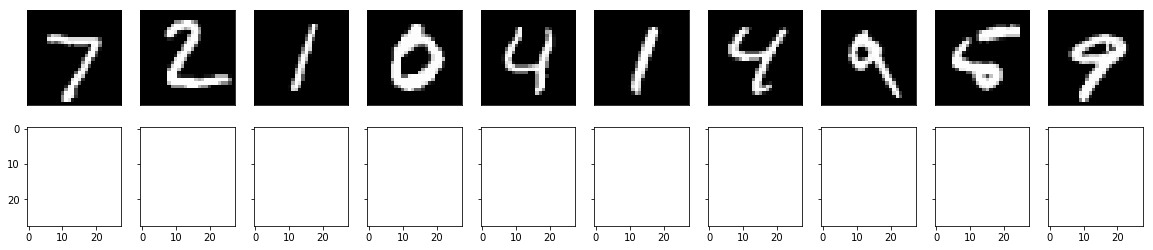

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [13]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.